<a href="https://colab.research.google.com/github/jbastian9/SeminarioBigData/blob/main/Copia_de_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Instalación de las librerías necesarias
!pip install pandas openpyxl textblob nltk

In [3]:
# Importación de las librerías
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Carga del archivo Excel
noticias = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Copia de Noticias2ver.xlsx')

# Asegurarte de que el archivo se ha cargado correctamente
print(noticias.head())


   Columna1                                             Título  \
0         0  ¿Cómo potencializar las ventas de un emprendim...   
1         1  Así apoyará Corea del Sur al país para enfrent...   
2         2  Nanotecnología, una receta para cultivos más s...   
3         3  Desorden de padres, causa de nueva jornada de ...   
4         4  Senado, citado para el 13 de abril, cuando ter...   

                                                info  \
0  La época de crisis de salud por coronavirus es...   
1  El Presidente aseguró que ya le han devuelto e...   
2  Los resultados están acompañados del llamado d...   
3  Secretaría de Educación insiste en que se lleg...   
4  Así lo anunció el presidente del Senado, Lidio...   

                                           contenido                Tipo  
0  En medio de la coyuntura ocasionada por la pro...            economia  
1  Este jueves, en el noveno día de cuarentena na...  Politica y Opinion  
2  Jenny Prieto y Álex Caro son una parej

In [5]:
# Extracción de la columna 'contenido'
contenido = noticias['contenido'].dropna()  # Elimina filas sin datos

# Limpieza de texto
import re
from nltk.corpus import stopwords

def limpiar_texto(texto):
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@w+|\#','', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = " ".join(word for word in texto.split() if word not in stopwords.words('spanish'))
    return texto

# Aplicar la función de limpieza a cada texto
noticias['contenido_limpio'] = contenido.apply(limpiar_texto)
contenido_limpio = contenido.apply(limpiar_texto)


In [6]:
# Análisis de sentimiento usando TextBlob
def analizar_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar análisis de sentimientos al contenido limpio
sentimientos = contenido_limpio.apply(analizar_sentimiento)


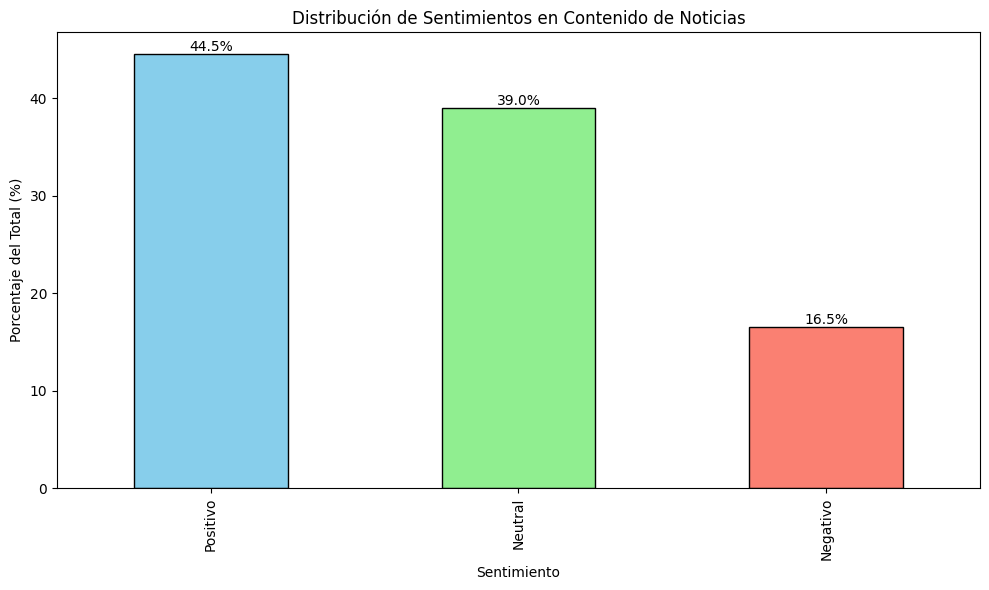

In [15]:
import matplotlib.pyplot as plt

df_resultados = pd.DataFrame(list(zip(contenido_limpio, sentimientos)), columns=['Contenido', 'Sentimiento'])

# Calcular porcentajes de cada tipo de sentimiento
conteo_sentimientos = df_resultados['Sentimiento'].value_counts(normalize=True) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Ordenar los valores para un gráfico más claro
conteo_sentimientos = conteo_sentimientos.sort_values(ascending=False)

# Generar el gráfico de barras
ax = conteo_sentimientos.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')

# Agregar porcentajes en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Configurar etiquetas y título
plt.title('Distribución de Sentimientos en Contenido de Noticias')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje del Total (%)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [8]:
!pip install pysentimiento

In [19]:
from pysentimiento import create_analyzer
import transformers

# Configuración para no mostrar warnings de transformers
transformers.logging.set_verbosity(transformers.logging.ERROR)

# Crear un DataFrame para los resultados
df_resultados = pd.DataFrame({
    'Contenido': noticias['contenido_limpio'],
    'Sentimiento_TextBlob': noticias['contenido_limpio'].apply(lambda texto: TextBlob(texto).sentiment.polarity),
})

In [20]:
# Crear el analizador de emociones
emotion_analyzer = create_analyzer(task="emotion", lang="es")

# Función para analizar emociones en el contenido de noticias
def analizar_emociones(texto):
    result = emotion_analyzer.predict(texto)
    return result

# Aplicar análisis de emociones al contenido de noticias
df_resultados['Analisis de Emociones'] = df_resultados['Contenido'].apply(analizar_emociones)

# Visualizar los resultados por cada noticia
print(df_resultados[['Contenido', 'Analisis de Emociones']])

                                             Contenido  \
0    En medio coyuntura ocasionada propagación coro...   
1    Este jueves noveno día cuarentena nacional pre...   
2    Jenny Prieto Álex Caro pareja cultivadores Jen...   
3    Aunque Secretaría Educación recomendó padres f...   
4    El presidente Congreso Lidio García anunció pr...   
..                                                 ...   
970  Frente medidas preventivas dispuesto Gobierno ...   
971  En agosto año pasado hombre 74 años presentó t...   
972  El presidente Iván Duque aseguró entrevista Pr...   
973  En vereda Santa Teresita zona rural municipio ...   
974  La pandemia coronavirus dejó viernes crisis al...   

                                 Analisis de Emociones  
0    AnalyzerOutput(output=others, probas={others: ...  
1    AnalyzerOutput(output=others, probas={others: ...  
2    AnalyzerOutput(output=others, probas={others: ...  
3    AnalyzerOutput(output=others, probas={others: ...  
4    AnalyzerOutpu

In [21]:
# Crear el analizador de discurso de odio
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

# Definir la función para analizar discurso de odio y obtener el formato deseado
def analizar_discurso_odio(texto):
    result = hate_speech_analyzer.predict(texto)
    return f"AnalyzerOutput(output={result.output}, probas={result.probas})"

# Aplicar análisis de discurso de odio al contenido de noticias
df_resultados['Discurso de Odio'] = df_resultados['Contenido'].apply(analizar_discurso_odio)

# Visualizar los resultados por cada noticia
print(df_resultados[['Contenido', 'Discurso de Odio']])


                                             Contenido  \
0    En medio coyuntura ocasionada propagación coro...   
1    Este jueves noveno día cuarentena nacional pre...   
2    Jenny Prieto Álex Caro pareja cultivadores Jen...   
3    Aunque Secretaría Educación recomendó padres f...   
4    El presidente Congreso Lidio García anunció pr...   
..                                                 ...   
970  Frente medidas preventivas dispuesto Gobierno ...   
971  En agosto año pasado hombre 74 años presentó t...   
972  El presidente Iván Duque aseguró entrevista Pr...   
973  En vereda Santa Teresita zona rural municipio ...   
974  La pandemia coronavirus dejó viernes crisis al...   

                                      Discurso de Odio  
0    AnalyzerOutput(output=['hateful'], probas={'ha...  
1    AnalyzerOutput(output=[], probas={'hateful': 0...  
2    AnalyzerOutput(output=[], probas={'hateful': 0...  
3    AnalyzerOutput(output=[], probas={'hateful': 0...  
4    AnalyzerOutpu

In [14]:
# Guardar los resultados en un archivo CSV
output_csv = 'resultados_discurso_odio.csv'
df_resultados[['Contenido', 'Discurso de Odio']].to_csv(output_csv, index=False)

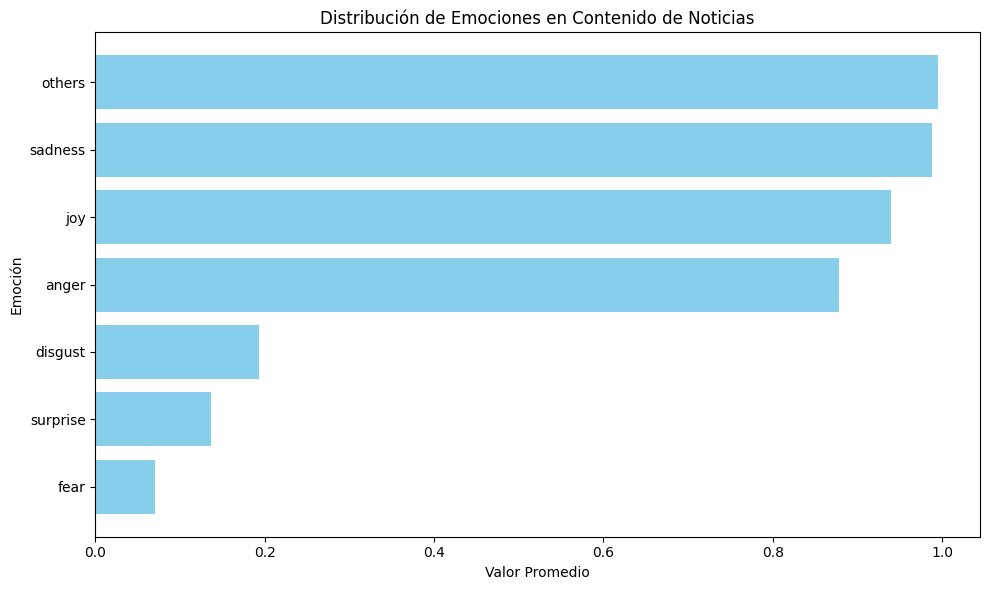

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer

# Crear el analizador de emociones
emotion_analyzer = create_analyzer(task="emotion", lang="es")

# Función para analizar emociones en el contenido de noticias
def analizar_emociones(texto):
    result = emotion_analyzer.predict(texto)
    return result

# Aquí podrías tener ya `df_resultados` con 'Contenido' y 'Emociones' como columnas

# Crear listas para almacenar los datos de emociones
emociones = []
valores_promedio = []

# Iterar sobre los resultados y extraer las emociones y sus valores promedio
for index, row in df_resultados.iterrows():
    emociones_dict = analizar_emociones(row['Contenido']).probas
    for emocion, valor in emociones_dict.items():
        emociones.append(emocion)
        valores_promedio.append(valor)

# Crear un DataFrame con las emociones y sus valores promedio
df_emociones = pd.DataFrame({'Emocion': emociones, 'Valor Promedio': valores_promedio})

# Ordenar el DataFrame por 'Valor Promedio' para mejor visualización en el gráfico
df_emociones = df_emociones.sort_values(by='Valor Promedio', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df_emociones['Emocion'], df_emociones['Valor Promedio'], color='skyblue')
plt.xlabel('Valor Promedio')
plt.ylabel('Emoción')
plt.title('Distribución de Emociones en Contenido de Noticias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la emoción más alta arriba
plt.tight_layout()
plt.show()